<a href="https://colab.research.google.com/github/RomanKotyk/sp-1/blob/main/%D1%87%D0%B0-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

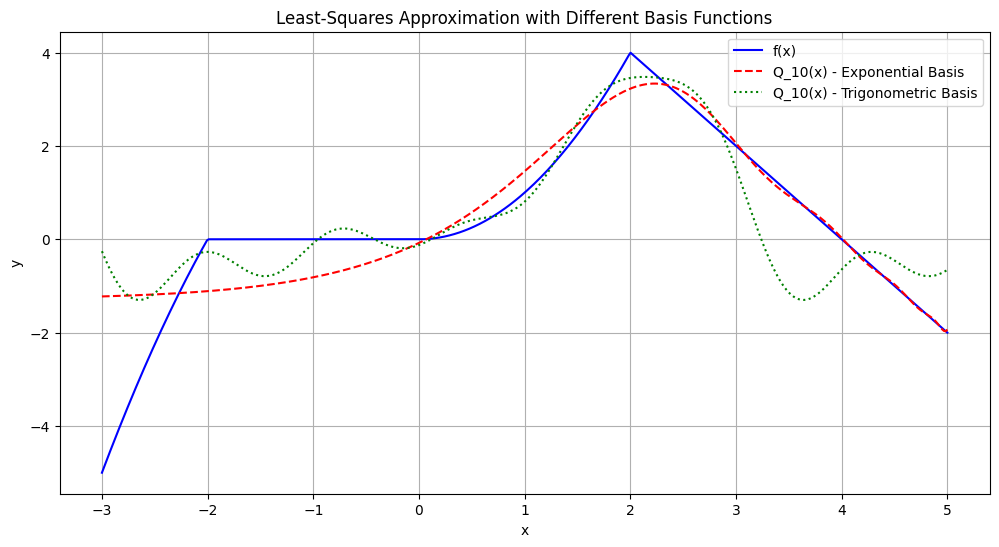

[ 7.17894633e-10 -9.91735760e-09 -8.54099198e-07 -6.56859484e-05
 -6.61575794e-03  1.34202957e+00  1.46083984e+01  2.67295000e+04
  1.77500800e+06 -5.24359680e+07  9.39537203e+09]
Mean Square Deviation (Exponential Basis): 0.6287539451087193
Mean Square Deviation (Trigonometric Basis): 0.9612523242016032


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the piecewise function f(x)
def f(x):
    if -3 <= x <= -2:
        return -x**2 + 4
    elif -2 < x <= 0:
        return 0
    elif 0 < x <= 2:
        return x**2
    elif 2 < x <= 5:
        return 8 - 2 * x
    else:
        return 0  # Outside the defined interval

# Define the interval [a, b]
a, b = -3, 5

# Set the degree of the polynomial (n)
n = 10

# Basis functions case 4: exponential functions
def basis_function_exp(i, x):
    return np.exp(i * x)  # Using only the real part

# Basis functions case 5: trigonometric functions
def basis_function_trig(i, x):
    if i == 0:
        return 1
    elif i % 2 == 1:
        return np.cos((i // 2 + 1) * x)
    else:
        return np.sin((i // 2) * x)

# Compute the coefficients using least squares method
def compute_coefficients(f, basis_function, n, a, b):
    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)

    # Populate matrix A and vector B for the normal equations
    for i in range(n + 1):
        for j in range(n + 1):
            A[i, j], _ = quad(lambda x: basis_function(i, x) * basis_function(j, x), a, b)
        B[i], _ = quad(lambda x: f(x) * basis_function(i, x), a, b)

    # Solve the normal equations to find coefficients
    coefficients = np.linalg.solve(A, B)
    r = B - np.dot(A, coefficients)
    return coefficients, r  # Use only real part for plotting

# Create the approximation polynomial Q_n(x) using the computed coefficients
def Q_n(x, coefficients, basis_function):
    return sum(c * basis_function(i, x) for i, c in enumerate(coefficients))

# Compute coefficients for exponential basis (case 4)
coefficients_exp, r_exp = compute_coefficients(f, basis_function_exp, n, a, b)

# Compute coefficients for trigonometric basis (case 5)
coefficients_trig, r_trig = compute_coefficients(f, basis_function_trig, n, a, b)

# Generate points for plotting
x_values = np.linspace(a, b, 500)
f_values = np.vectorize(f)(x_values)
Q_values_exp = [Q_n(x, coefficients_exp, basis_function_exp) for x in x_values]
Q_values_trig = [Q_n(x, coefficients_trig, basis_function_trig) for x in x_values]

# Plot the original function and the approximations
plt.figure(figsize=(12, 6))

# Original function plot
plt.plot(x_values, f_values, label="f(x)", color="blue")

# Approximation with exponential basis
plt.plot(x_values, Q_values_exp, label=f"Q_{n}(x) - Exponential Basis", color="red", linestyle="--")

# Approximation with trigonometric basis
plt.plot(x_values, Q_values_trig, label=f"Q_{n}(x) - Trigonometric Basis", color="green", linestyle=":")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Least-Squares Approximation with Different Basis Functions")
plt.grid(True)
plt.show()

print(r_exp)

# Calculate and print the mean square deviations for both bases
mean_square_error_exp = np.mean((f_values - Q_values_exp) ** 2)
mean_square_error_trig = np.mean((f_values - Q_values_trig) ** 2)
print("Mean Square Deviation (Exponential Basis):", mean_square_error_exp)
print("Mean Square Deviation (Trigonometric Basis):", mean_square_error_trig)

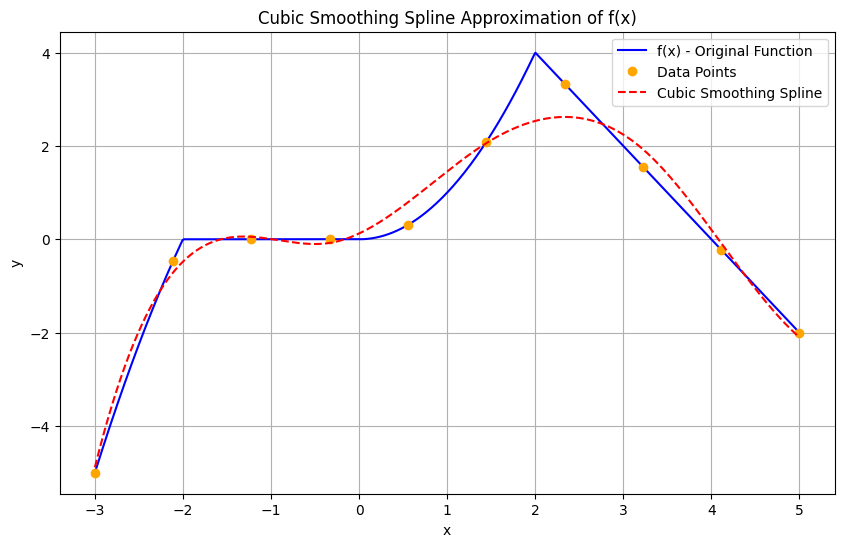

Mean Square Deviation: 0.15759732437471022


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Define the piecewise function f(x) as before
def f(x):
    if -3 <= x <= -2:
        return -x**2 + 4
    elif -2 < x <= 0:
        return 0
    elif 0 < x <= 2:
        return x**2
    elif 2 < x <= 5:
        return 8 - 2 * x
    else:
        return 0  # Outside the defined interval

# Generate tabulated points for f(x)
n = 10  # Number of points
x_points = np.linspace(-3, 5, n)
y_points = np.vectorize(f)(x_points)

# Define the smoothing parameter rho
rho = 1  # Initial weight, can be adjusted if necessary

# Create the cubic smoothing spline with weight rho
smoothing_spline = UnivariateSpline(x_points, y_points, s=rho)

# Generate points for plotting
x_values = np.linspace(-3, 5, 500)
f_values = np.vectorize(f)(x_values)
spline_values = smoothing_spline(x_values)

# Plot the original function and the smoothing spline approximation
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label="f(x) - Original Function", color="blue")
plt.plot(x_points, y_points, 'o', label="Data Points", color="orange")
plt.plot(x_values, spline_values, label="Cubic Smoothing Spline", color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Cubic Smoothing Spline Approximation of f(x)")
plt.grid(True)
plt.show()

# Calculate and print the mean square deviation
mean_square_error = np.mean((f_values - spline_values) ** 2)
print("Mean Square Deviation:", mean_square_error)